In [1]:
import warnings
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 13
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['text.usetex'] = True
plt.rcParams["figure.figsize"] = (15,6)
warnings.filterwarnings('ignore')

To find eigenvalues of the bound state particle of mass in a one dimensional potential well by solving the transcendental equation that appears as the eigenvalue condition (graphs are to be plotted for appropriate guess values, scipy root searching package may be used) and to plot the eigenfunctions.

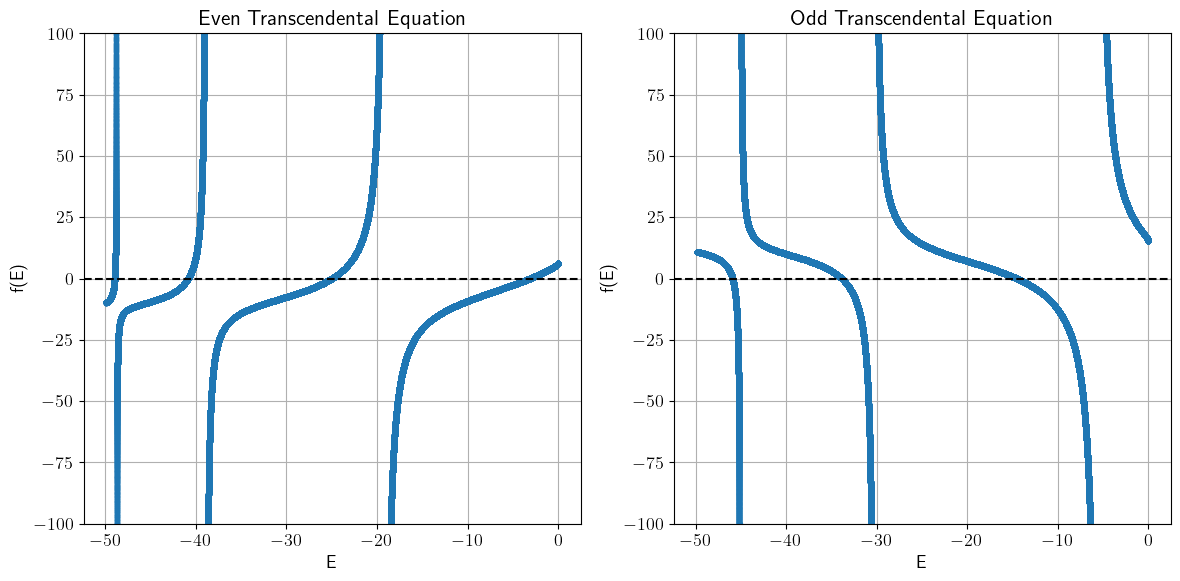

Invalid bracket for even solution: (-45, -35)
Invalid bracket for even solution: (-8, -6)
Invalid bracket for odd solution: (-35, -25)
Invalid bracket for odd solution: (-3, -1)


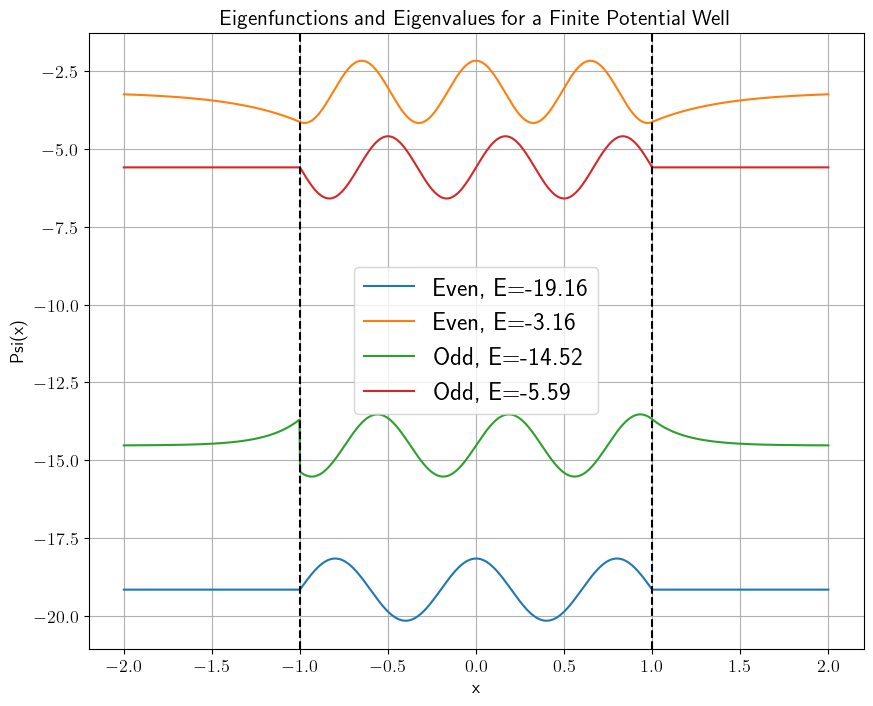

In [2]:
hbar = 1.0  # Reduced Planck's constant
m = 1.0     # Mass of the particle
a = 1.0     # Half-width of the potential well
V0 = 50.0   # Depth of the potential well

# Transcendental equations for even and odd solutions
def even_trans_eq(E):
    if E + V0 <= 0:
        return np.nan
    k = np.sqrt(2 * m * (E + V0)) / hbar
    kappa = np.sqrt(2 * m * V0 - k**2 * hbar**2) / hbar
    return k * np.tan(k * a) - kappa

def odd_trans_eq(E):
    if E + V0 <= 0:
        return np.nan
    k = np.sqrt(2 * m * (E + V0)) / hbar
    kappa = np.sqrt(2 * m * V0 - k**2 * hbar**2) / hbar
    return k * (1/np.tan(k * a)) + kappa

E_values = np.linspace(-V0 + 0.1, 0, 500000)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(E_values, [even_trans_eq(E) for E in E_values],'.', label='even_trans_eq')
plt.axhline(0, color='black', linestyle='--')
plt.title('Even Transcendental Equation')
plt.xlabel('E')
plt.ylabel('f(E)')
plt.ylim([-100,100])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(E_values, [odd_trans_eq(E) for E in E_values],'.', label='odd_trans_eq')
plt.axhline(0, color='black', linestyle='--')
plt.title('Odd Transcendental Equation')
plt.xlabel('E')
plt.ylabel('f(E)')
plt.ylim([-100,100])
plt.grid()

plt.tight_layout()
plt.show()

eigenvalues_even = []
eigenvalues_odd = []

E_brackets_even = [(-45, -35), (-20, -15), (-8, -6), (-4, -2)]
E_brackets_odd = [(-35, -25), (-15, -10), (-6, -4), (-3, -1)]

def is_valid_bracket(func, bracket):
    return np.sign(func(bracket[0])) != np.sign(func(bracket[1]))

for bracket in E_brackets_even:
    if is_valid_bracket(even_trans_eq, bracket):
        sol = sc.optimize.root_scalar(even_trans_eq, bracket=bracket, method='brentq')
        eigenvalues_even.append(sol.root)
    else:
        print(f"Invalid bracket for even solution: {bracket}")

for bracket in E_brackets_odd:
    if is_valid_bracket(odd_trans_eq, bracket):
        sol = sc.optimize.root_scalar(odd_trans_eq, bracket=bracket, method='brentq')
        eigenvalues_odd.append(sol.root)
    else:
        print(f"Invalid bracket for odd solution: {bracket}")

x = np.linspace(-2 * a, 2 * a, 1000)

def psi_even(x, E):
    k = np.sqrt(2 * m * (E + V0)) / hbar
    kappa = np.sqrt(2 * m * V0 - k**2 * hbar**2) / hbar
    A = 1.0  # Normalization constant
    psi = np.zeros_like(x)
    for i, xi in enumerate(x):
        if -a <= xi <= a:
            psi[i] = A * np.cos(k * xi)
        elif xi < -a:
            psi[i] = A * np.cos(k * a) * np.exp(kappa * (xi + a))
        else:
            psi[i] = A * np.cos(k * a) * np.exp(-kappa * (xi - a))
    return psi

def psi_odd(x, E):
    k = np.sqrt(2 * m * (E + V0)) / hbar
    kappa = np.sqrt(2 * m * V0 - k**2 * hbar**2) / hbar
    A = 1.0  # Normalization constant
    psi = np.zeros_like(x)
    for i, xi in enumerate(x):
        if -a <= xi <= a:
            psi[i] = A * np.sin(k * xi)
        elif xi < -a:
            psi[i] = A * np.sin(k * a) * np.exp(kappa * (xi + a))
        else:
            psi[i] = A * np.sin(k * a) * np.exp(-kappa * (xi - a))
    return psi

plt.figure(figsize=(10, 8))

for E in eigenvalues_even:
    plt.plot(x, psi_even(x, E) + E, label=f'Even, E={E:.2f}')

for E in eigenvalues_odd:
    plt.plot(x, psi_odd(x, E) + E, label=f'Odd, E={E:.2f}')

plt.axvline(x=-a, color='k', linestyle='--')
plt.axvline(x=a, color='k', linestyle='--')
plt.xlabel('x')
plt.ylabel('Psi(x)')
plt.title('Eigenfunctions and Eigenvalues for a Finite Potential Well')
plt.legend()
plt.grid()
plt.show()

Solve the s-wave Schrodinger equation for the ground state and the first excited state of the hydrogen atom:                    
$ \qquad \displaystyle{\frac{d^2 y}{dr^2}= A(r)\ u(r)}$                                                                       
$ \qquad \displaystyle{A(r)=\frac{2\mu}{\hbar^2}\left[\ V(r)-E \ \right]  }$ where $\displaystyle{V(r)=-\frac{e^2}{r}}$                     
Here, $m$ is the reduced mass of the electron. Obtain the energy eigenvalues and plot the corresponding wavefunctions.      
Remember that the ground state energy of the hydrogen atom is $-13.6 eV$.                                                
Take $e = 3.795 (eVÅ)^{1/2}, \hbar c = 1973 (eVÅ)$ and $m = 0.511\times 10^6 eV/c^2$.

[[-2. -0. -0. ... -0. -0. -0.]
 [-0. -2.  1. ... -0. -0. -0.]
 [-0.  1. -2. ... -0. -0. -0.]
 ...
 [-0. -0. -0. ... -2.  1. -0.]
 [-0. -0. -0. ...  1. -2.  1.]
 [-0. -0. -0. ... -0.  1. -2.]]


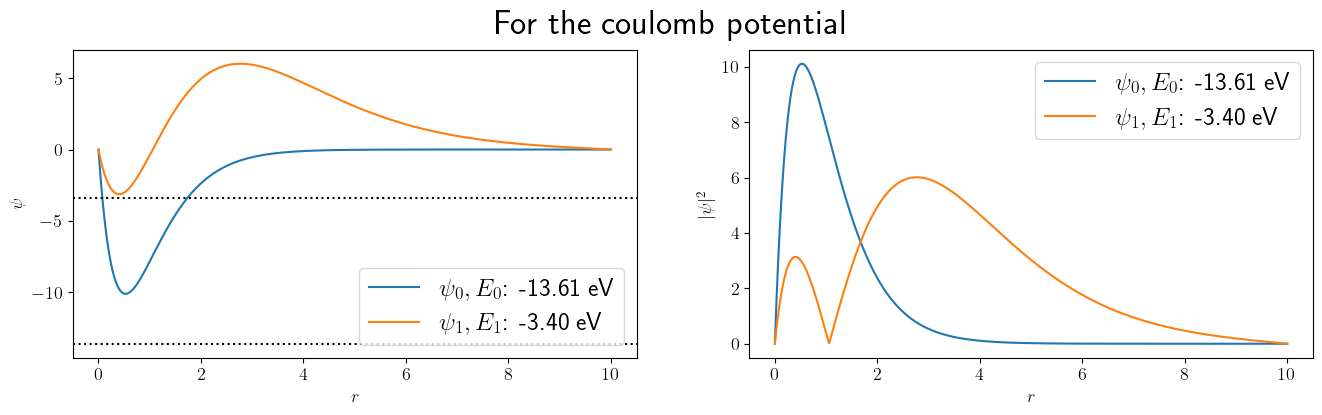

In [3]:
h = 1973
m = 0.511e6
e = 3.795
r_min = 1e-12
r_max = 10
n = 1000
r = np.linspace(r_min, r_max, n)
dr = r[1] - r[0]

V = np.zeros((n, n))
for i in range(1,n):
    V[i, i] = -e**2 / r[i]
#print(V)
A = -2*np.eye(n,n)
for i in range(1,n-1):
    A[i, i+1]=1
    A[i+1, i]=1
#A=np.diag([-2]*(n),0) + np.diag([1]*(n-1),-1) + np.diag([1]*(n-1),1)
print(A)
H = ((-h**2) / (2 * m * dr**2)) * A + V
E, U= np.linalg.eigh(H)
U = U/dr

fig = plt.figure(figsize = (16,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.plot(r,U[:,0], label=r'$\psi_0,E_0$'+f': { E[0]:.2f} eV')
ax1.plot(r,-U[:,1], label=r'$\psi_1,E_1$'+f': { E[1]:.2f} eV')
ax1.axhline(y=E[1], color="black", linestyle=":")
ax1.axhline(y=E[0], color="black", linestyle=":")
ax2.plot(r,abs(U[:,0]), label=r'$\psi_0,E_0$'+f': { E[0]:.2f} eV')
ax2.plot(r,abs(U[:,1]), label=r'$\psi_1,E_1$'+f': { E[1]:.2f} eV')
fig.suptitle('For the coulomb potential', fontsize = 25)
ax1.set_ylabel(r'$\psi$')
ax1.set_xlabel(r'$r$')
ax2.set_ylabel(r'$|\psi|^2$')
ax2.set_xlabel(r'$r$')
ax1.legend()
ax2.legend()
plt.show()

Solve the s-wave radial Schrodinger equation for an atom :                    
$ \qquad \displaystyle{\frac{d^2 y}{dr^2}= A(r)\ u(r)}$                                                                       
$ \qquad \displaystyle{A(r)=\frac{2\mu}{\hbar^2}\left[\ V(r)-E \ \right]  }$                                              
where $m$ is the reduced mass of the system (which can be chosen to be the mass of an electron),                               
for the screened coulomb potential where                                                                                       
$\qquad\displaystyle{V(r)=-\frac{e^2}{r} e^{-\frac{r}{a}}}$                                                                                   
Find the energy (in $eV$) of the ground state of the atom to an accuracy of three significant digits.                            
Also, plot the corresponding wavefunction. Take $e = 3.795 (eVÅ)^{1/2}, m = 0.511\times 10^6 eV/c^2$, and $a = 3 Å, 5 Å, 7 Å$.                                                                                                                       
In these units $\hbar c = 1973 (eVÅ)$. The ground state energy is expected to be above $-12 eV$ in all three cases.                

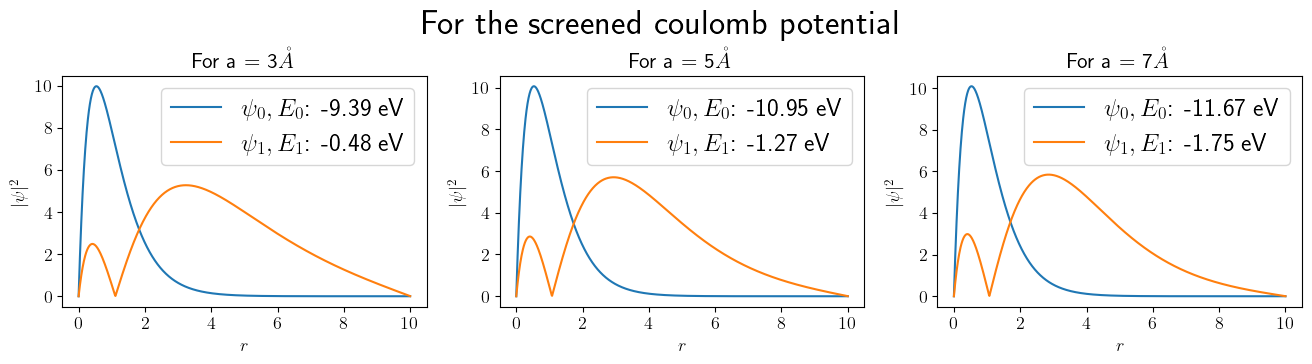

In [4]:
h = 1973
m = 0.511e6
e = 3.795
a = [ 3, 5, 7]

r_min = 1e-12
r_max = 10
n = 1000
r = np.linspace(r_min, r_max, n)
dr = r[2] - r[1]

def V(r,n,a):
    V = np.zeros((n, n))
    for i in range(1,n):
        V[i, i] = (-e**2/r[i])*np.exp(-r[i]/a)
    return V

A = -2*np.eye(n,n)
for i in range(1,n-1):
    A[i, i+1]=1
    A[i+1, i]=1
    
fig = plt.figure(figsize=(16,3))
fig.suptitle('For the screened coulomb potential',y=1.1, fontsize = 25)
for j in range(len(a)):
    H = (-(h**2)/ (2 * m * dr**2)) * A + V(r,n,a[j])
    E, U= np.linalg.eigh(H)
    U = U/dr
    plt.subplot(1,3,j+1)
    plt.plot(r,abs(U[:,0]), label=r'$\psi_0,E_0$'+f': { E[0]:.2f} eV')
    plt.plot(r,abs(U[:,1]), label=r'$\psi_1,E_1$'+f': { E[1]:.2f} eV')
    plt.title(f'For a = {a[j]}'+r'$\mathring{A}$')
    plt.ylabel(r'$|\psi|^2$')
    plt.xlabel(r'$r$')
    plt.legend()
plt.show()

Solve the s-wave radial Schrodinger equation for a particle of mass $m$ :                    
$ \qquad \displaystyle{\frac{d^2 y}{dr^2}= A(r)\ u(r)}$                                                                       
$ \qquad \displaystyle{A(r)=\frac{2\mu}{\hbar^2}\left[\ V(r)-E \ \right]  }$                                              
For the anharmonic oscillator potential                                                                                       
$\qquad\displaystyle{V(r)=\frac{1}{2}kr^2+\frac{1}{3}br^3}$                                                                                   
for the ground state energy (in $MeV$) of particle to an accuracy of three significant digits.                                         
Also, plot the corresponding wave function. Choose $m = 940 MeV/c^2, k = 100 MeV fm^{-2}, b = 0, 10, 30 MeV fm^{-3}$.               
In these units, $\hbar c = 197.3 MeV fm$. The ground state energy $I$ expected to lie between $90$ and $110 MeV$ for all three cases.

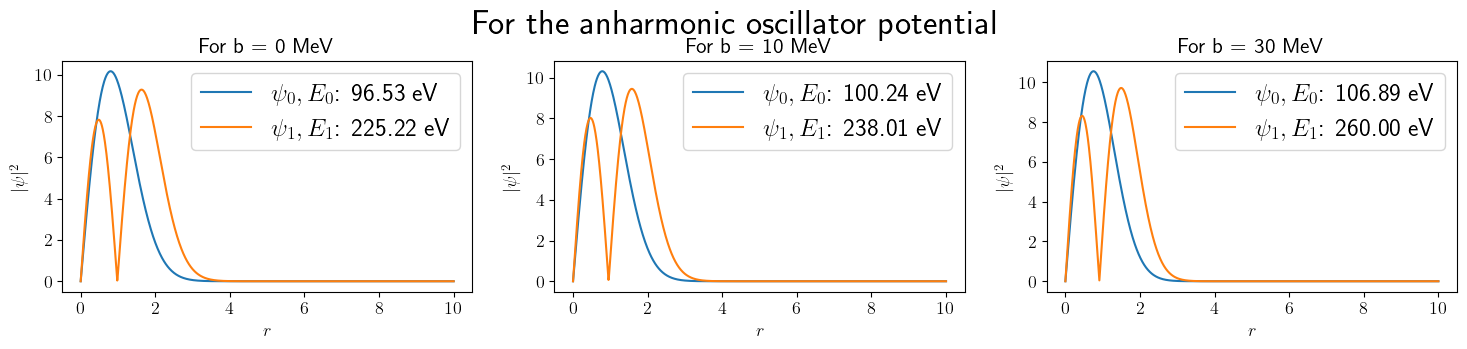

In [5]:
h = 197.3
m = 940
k = 100
b = [ 0, 10, 30]

r_min = 1e-12
r_max = 10
n = 1000
r = np.linspace(r_min, r_max, n)
dr = r[2] - r[1]

def V(r,n,b,k):
    V = np.zeros((n, n))
    for i in range(1,n):
        V[i, i] = (k*(r[i])**2/2) + (b*(r[i])**3/3)
    return V
    
A = -2*np.eye(n,n)
for i in range(1,n-1):
    A[i, i+1]=1
    A[i+1, i]=1
    
fig = plt.figure(figsize=(18,3))
fig.suptitle('For the anharmonic oscillator potential',y=1.05, fontsize = 25)
for j in range(len(b)):
    H = (-(h**2) / (2 * m * dr**2)) * A + V(r,n,b[j],k)
    E, U= np.linalg.eigh(H)
    U = U/dr
    plt.subplot(1,3,j+1)
    plt.plot(r,abs(U[:,0]), label=r'$\psi_0,E_0$'+f': { E[0]:.2f} eV')
    plt.plot(r,abs(U[:,1]), label=r'$\psi_1,E_1$'+f': { E[1]:.2f} eV')
    plt.ylabel(r'$|\psi|^2$')
    plt.xlabel(r'$r$')
    plt.title(f'For b = {b[j]} MeV')
    plt.legend()
plt.show()

Solve the s-wave radial Schrodinger equation for the vibrations of hydrogen molecule :                                                                     
$ \qquad \displaystyle{\frac{d^2 y}{dr^2}= A(r)\ u(r)}$                                                                       
$ \qquad \displaystyle{A(r)=\frac{2\mu}{\hbar^2}\left[\ V(r)-E \ \right]  }$                                              
$ \qquad$ where $\mu$ is the reduced mass of the two-atom system for the Morse potential                                                     
$\qquad\displaystyle{V(r)=D(e^{-2ar'}-e^{-ar'}) , \qquad r'=\frac{r-r_o}{r}}$                                                                                   
Find the lowest vibrational energy (in $MeV$) of the molecule to an accuracy of three significant digits.                    
Also plot the corresponding wave function. Take : $m = 940\times 10^6 eV/C^2, D = 0.755501 eV, \alpha = 1.44, r_o = 0.131349 Å$

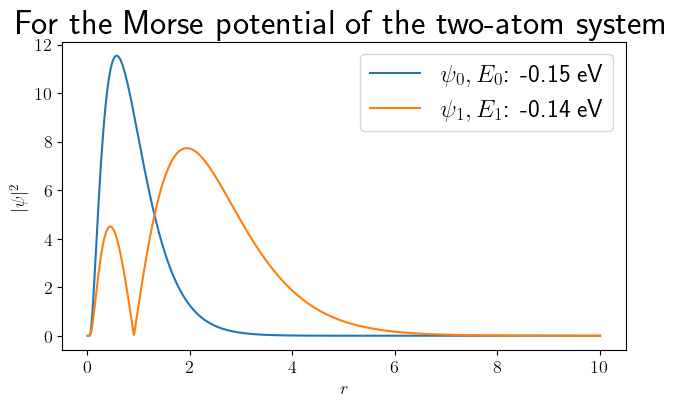

In [6]:
h = 1973
m = 940e6
D = 0.755501
a = 1.44
r_o = 0.131349

r_min = 0.01
r_max = 10
n = 1000
r = np.linspace(r_min, r_max, n)
dr = r[2] - r[1]

V = np.zeros((n, n))
for i in range(1,n):
    rp = (r[i]-r_o)/r[i]
    V[i, i] = D*(np.exp(-2*a*rp)-np.exp(-a*rp))

A = -2*np.eye(n,n)
for i in range(1,n-1):
    A[i, i+1]=1
    A[i+1, i]=1
    
H = (-(h**2) / (2 * m * dr**2)) * A + V
E, U= np.linalg.eigh(H)
U = U/dr
fig = plt.figure(figsize = (16,4))
ax1 = fig.add_subplot(1,2,1)
ax1.plot(r,abs(U[:,0]), label=r'$\psi_0,E_0$'+f': { E[0]:.2f} eV')
ax1.plot(r,abs(U[:,1]), label=r'$\psi_1,E_1$'+f': { E[1]:.2f} eV')
ax1.set_title('For the Morse potential of the two-atom system', fontsize = 25)
ax1.set_ylabel(r'$|\psi|^2$')
ax1.set_xlabel(r'$r$')
ax1.legend()
plt.show()

A spin$-\frac{1}{2}$ particle is placed within a magnetic field $\hat{B}$ along $x-$direction so that the interaction Hamiltonian is given by $\hat{B}=gB\hat{s}_x$ where $\displaystyle\hat{s}_x= \frac{\hbar}{2} \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}$ .                                                  
Use scipy to find out the eigenvalues and eigenvectors and appropriate similarity transformation to construct the time evolution operator $\displaystyle\hat{U(t)}=e^{-\frac{i\hat{H}t}{\hbar}}$.                                                                                                            
Plot the time variation of probability of finding the particle in either up or down state of $\displaystyle\hat{s}_z= \frac{\hbar}{2} \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}$ .                                                                                                                                   
Initial state may be chosen in either up or down state. 

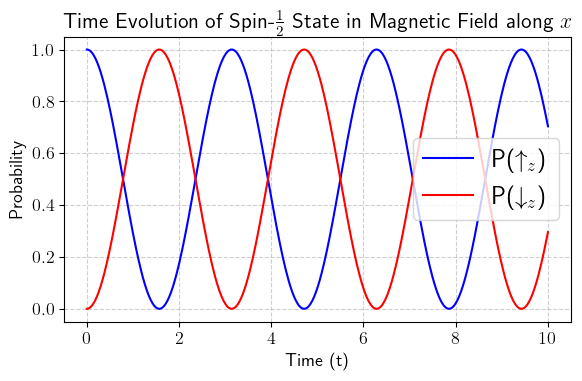

In [7]:
hbar = 1  # Planck's reduced constant (set to 1 for simplicity)
g   = 2.0   # gyromagnetic ratio
B   = 1.0   # magnetic field strength
s_x = 0.5 * hbar * np.array([[0, 1], [1, 0]]) # Spin-1/2 operator s_x
s_z = 0.5 * hbar * np.array([[1, 0], [0, -1]]) # Spin-1/2 operator s_
H   = g * B * s_x # Hamiltonian: H = g B s_x
eigenvalues, eigenvectors = sc.linalg.eigh(H)  # Diagonalize H
up_z      = np.array([1, 0])         # spin up in z-basis
down_z    = np.array([0, 1])       #spin down in z-basis
times     = np.linspace(0, 10, 500)
prob_up   = []
prob_down = []

def U(t):                                                # Time evolution operator U(t) = e^(-i H t / hbar)
    D = np.diag(np.exp(-1j * eigenvalues * t / hbar))    # exponential of diagonal
    return eigenvectors @ D @ np.linalg.inv(eigenvectors)

for t in times:
    psi_t = U(t) @ up_z
    prob_up.append(np.abs(up_z.conj().T @ psi_t)**2)
    prob_down.append(np.abs(down_z.conj().T @ psi_t)**2)

plt.figure(figsize=(6, 4))
plt.plot(times, prob_up, label=r'P($\uparrow_z$)', color='blue')
plt.plot(times, prob_down, label=r'P($\downarrow_z$)', color='red')
plt.xlabel('Time (t)')
plt.ylabel('Probability')
plt.title('Time Evolution of Spin-$\\frac{1}{2}$ State in Magnetic Field along $x$')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

Find the energy eigenvalues and eigenfunctions for the ground state and the first excited stationary state                                           
for a one dimensional square well of infinite depth, using the shooting method.

Guideline: Apply shooting method for solving the relevant energy eigenvalue equation. Use scipy.integrate.odeint (in Python) as integrator.             
As multiple eigenvalues exist, the use of bisection root finding method is recommended to find the energy eigenvalues precisely.                        
Construct the wave-function. Use scipy.integrate.simps (in Python) for normalization.

A particle is confined in a 1D infinite square well of width $L$ (say, $L = 1$):

* $V(x) = 0$ for $0 < x < L$
* $V(x) = \infty$ otherwise

We solve the **time-independent Schrödinger equation (TISE)**:

$$
\frac{d^2\psi}{dx^2} + \frac{2mE}{\hbar^2} \psi = 0 \quad \text{for } x \in (0, L)
$$

Let:

$$
k^2 = \frac{2mE}{\hbar^2}
$$

Then the equation becomes:

$$
\psi''(x) + k^2 \psi(x) = 0
$$

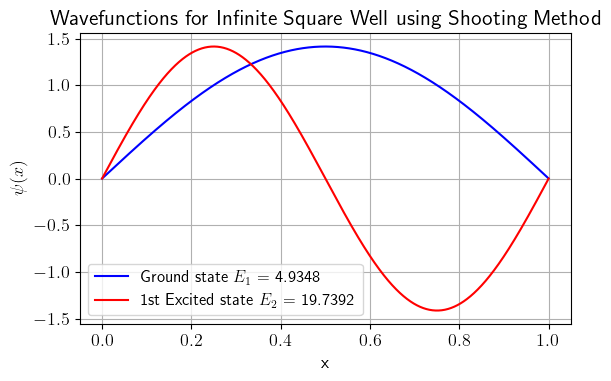

In [8]:
def schrodinger(y, x, E):
    psi, phi = y
    dpsi_dx = phi
    dphi_dx = -2 * E * psi  # since hbar = m = 1
    return [dpsi_dx, dphi_dx]

def shoot(E):
    y0 = [0, 1]  # psi(0) = 0, psi'(0) = 1
    sol = sc.integrate.odeint(schrodinger, y0, x_vals, args=(E,))
    psi = sol[:, 0]
    return psi[-1]  # value at x = L

def find_energy(E_low, E_high):
    return sc.optimize.bisect(shoot, E_low, E_high, xtol=1e-10)

def normalize(psi, x):
    norm = np.sqrt(sc.integrate.simps(psi**2, x))
    return psi / norm

L = 1.0  
x_vals = np.linspace(0, L, 1000)
E1 = find_energy(0.1, 10)  # Ground state
E2 = find_energy(10, 30)   # First excited state
psi1 = sc.integrate.odeint(schrodinger, [0, 1], x_vals, args=(E1,))[:, 0]
psi2 = sc.integrate.odeint(schrodinger, [0, 1], x_vals, args=(E2,))[:, 0]
psi1 = normalize(psi1, x_vals)
psi2 = normalize(psi2, x_vals)

plt.figure(figsize=(6,4))
plt.plot(x_vals, psi1, label=f'Ground state $E_1$ = {E1:.4f}', color='blue')
plt.plot(x_vals, psi2, label=f'1st Excited state $E_2$ = {E2:.4f}', color='red')
plt.xlabel("x")
plt.ylabel(r"$\psi(x)$")
plt.title("Wavefunctions for Infinite Square Well using Shooting Method")
plt.grid(True)
plt.legend(loc='lower left', fontsize=12)
plt.tight_layout()
plt.show()

Find the energy eigenvalues and eigenfunctions of a linear harmonic oscillator in one dimension.

Guideline: Write down the appropriate Schrödinger equation and convert it in a dimensionless form. Apply shooting method.                               
Only energy eigenvalues of the ground state and the first excited state are to be computed along with the plot of corresponding probability distributions of position measurement.


##### **Goal is to Find** :

* **Ground state and first excited state energy eigenvalues**.
* **Corresponding wavefunctions and probability distributions** i.e. $\psi, \ |\psi|^2$.

The **time-independent Schrödinger equation** for a 1D harmonic oscillator is:

$$ \frac{\hbar^2}{2m} \frac{d^2 \psi}{dx^2} + \frac{1}{2} m \omega^2 x^2 \psi = E \psi $$


Let:

* $\displaystyle\xi = \sqrt{\frac{m\omega}{\hbar}} x$
* $\displaystyle\epsilon = \frac{2E}{\hbar \omega}$

Then the dimensionless Schrödinger equation becomes:

$$ \frac{d^2 \psi}{d\xi^2} + (\epsilon - \xi^2) \psi = 0 $$



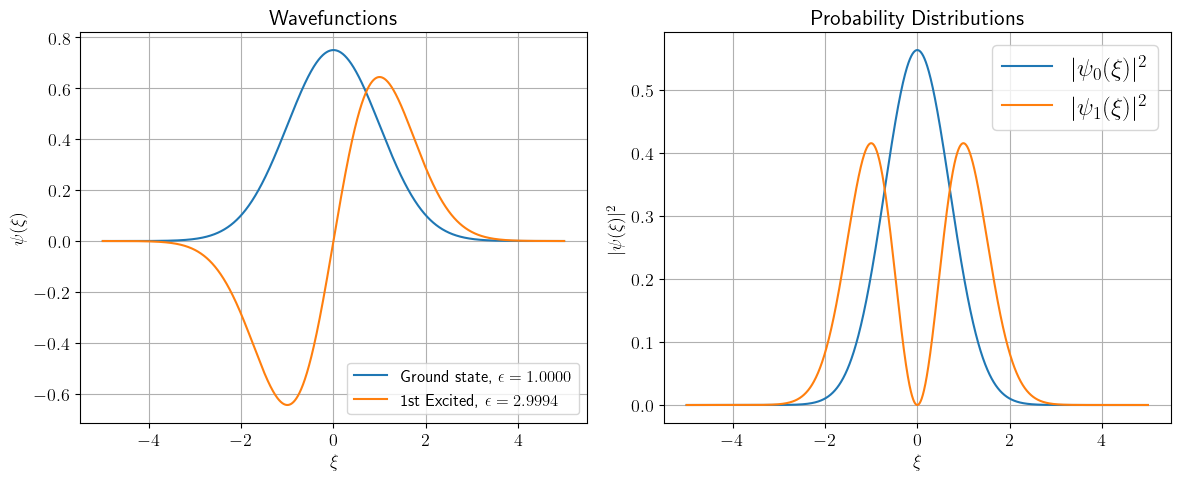

In [9]:
def schrodinger_eq(xi, y, epsilon):
    psi, dpsi = y
    return [dpsi, (xi**2 - epsilon)*psi]

def solve_wavefunction(epsilon, xi_max=5, num_points=1000, parity='even'):
    xi = np.linspace(0, xi_max, num_points)
    if parity == 'even':
        y0 = [1.0, 0.0]  # ψ(0)=1, ψ'(0)=0
    elif parity == 'odd':
        y0 = [0.0, 1.0]  # ψ(0)=0, ψ'(0)=1
    sol = sc.integrate.solve_ivp(schrodinger_eq, [0, xi_max], y0, args=(epsilon,), t_eval=xi)
    return xi, sol.y[0]

def find_eigenvalue(eps_range, parity):# Shooting method to find correct epsilon
    def boundary_value(eps):
        xi, psi = solve_wavefunction(eps, parity=parity)
        return psi[-1]
    return sc.optimize.bisect(boundary_value, *eps_range, xtol=1e-8)

eps0 = find_eigenvalue((0.9, 1.1), 'even')  # Ground state
xi_pos, psi0_pos = solve_wavefunction(eps0, parity='even')
eps1 = find_eigenvalue((2.9, 3.1), 'odd')   # First excited state
xi_pos, psi1_pos = solve_wavefunction(eps1, parity='odd')

xi   = np.concatenate((-xi_pos[::-1], xi_pos))           # Reflect to negative xi for full wavefunction
psi0 = np.concatenate((psi0_pos[::-1], psi0_pos))       # even
psi1 = np.concatenate((-psi1_pos[::-1], psi1_pos))      # odd

# Normalize wavefunctions
dx = xi[1] - xi[0]
psi0 /= np.sqrt(np.sum(psi0**2) * dx)
psi1 /= np.sqrt(np.sum(psi1**2) * dx)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(xi, psi0, label=f"Ground state, $\epsilon={eps0:.4f}$")
plt.plot(xi, psi1, label=f"1st Excited, $\epsilon={eps1:.4f}$")
plt.xlabel(r"$\xi$")
plt.ylabel(r"$\psi(\xi)$")
plt.title("Wavefunctions")
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(xi, psi0**2, label=r"$|\psi_0(\xi)|^2$")
plt.plot(xi, psi1**2, label=r"$|\psi_1(\xi)|^2$")
plt.xlabel(r"$\xi$")
plt.ylabel(r"$|\psi(\xi)|^2$")
plt.title("Probability Distributions")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

From the analytical solutions of Hydrogen atom energy eigenvalue problem                                                                                
check numerically the orthonormality conditions of stationary states and plot the radial wave-function.                                                                                                                               
Plot the radial and angular distribution of probability for finding position of the electron, in ground state and in first excited states.               
Find the radial distance $r_{\tiny{0.99}}$ within which the probability of finding the electron is 0.99

Guideline: Use scipy.special for special functions and scipy.integrate. Plot the angular distribution in polar plot using matplotlib.pyplot.polar.     
For $r_{\tiny{0.99}}$ set a transcendental equation and solve using Newton Raphson method. 


In atomic units ($\hbar = m = e = 1$), the time-independent Schrödinger equation separates into:

##### Radial part:

$$
R_{n\ell}(r) = N_{n\ell} \cdot r^\ell \cdot e^{-r/n} \cdot L_{n - \ell - 1}^{2\ell+1}\left(\frac{2r}{n}\right)
$$

* $L_k^a(x)$: associated Laguerre polynomial
* $N_{n\ell}$: normalization constant

##### Energy:

$$
E_n = -\frac{1}{2n^2}
$$

Orthonormality Check (⟨R_{n1}|R_{n2}⟩):
⟨1|1⟩ = 1.0000
⟨1|2⟩ = 0.0000
⟨2|1⟩ = 0.0000
⟨2|2⟩ = 1.0000


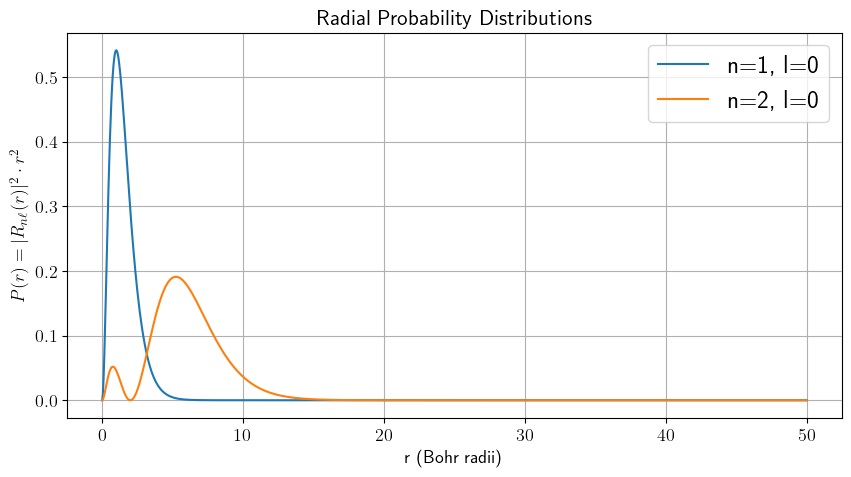

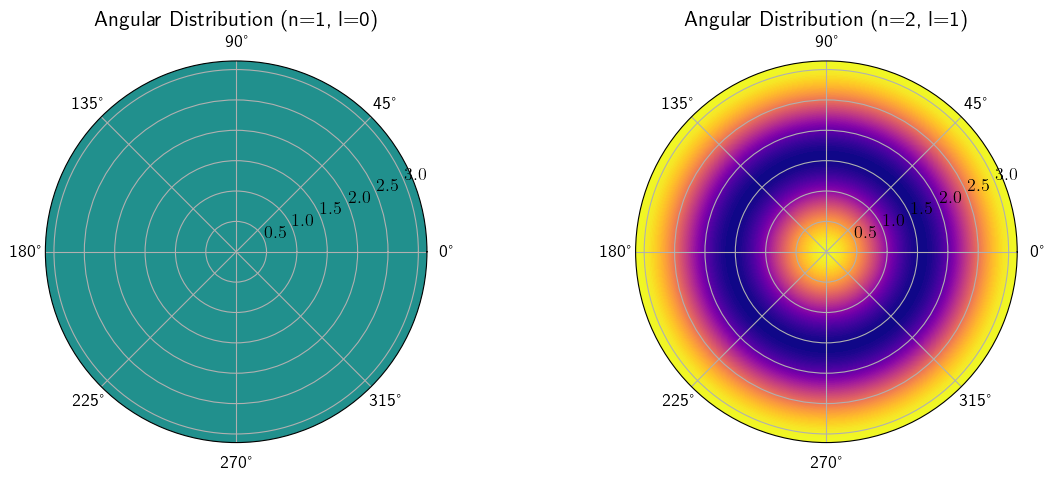

r_0.99 for ground state ≈ 4.2030 Bohr radii


In [10]:
def R_nl(r, n, l):
    rho = 2 * r / n
    norm = np.sqrt((2 / n)**3 * np.math.factorial(n - l - 1) / (2 * n * np.math.factorial(n + l)))
    L = sc.special.genlaguerre(n - l - 1, 2 * l + 1)(rho)
    return norm * np.exp(-rho / 2) * rho**l * L                   # Radial wavefunction R_{n,l}(r)

n_vals = [1, 2]  # Ground state and first excited
l_vals = [0, 0]  # We'll take s-states (l=0) for simplicity
r = np.linspace(1e-5, 50, 1000)
results = {}

for (n1, l1) in zip(n_vals, l_vals):
    for (n2, l2) in zip(n_vals, l_vals):
        R1 = R_nl(r, n1, l1)
        R2 = R_nl(r, n2, l2)
        integrand = R1 * R2 * r**2
        overlap = sc.integrate.simps(integrand, r)
        results[(n1, n2)] = overlap                  # Check orthonormality

print("Orthonormality Check (⟨R_{n1}|R_{n2}⟩):")
for (n1, n2), val in results.items():
    print(f"⟨{n1}|{n2}⟩ = {val:.4f}")

plt.figure(figsize=(10, 5))
for n, l in zip(n_vals, l_vals):
    R = R_nl(r, n, l)
    P = (R**2) * r**2
    plt.plot(r, P, label=f"n={n}, l={l}")
plt.title("Radial Probability Distributions")
plt.xlabel("r (Bohr radii)")
plt.ylabel(r"$P(r) = |R_{n\ell}(r)|^2 \cdot r^2$")
plt.legend()
plt.grid(True)
plt.show()

# Angular distribution using spherical harmonics Y_{l,m}
theta = np.linspace(0, np.pi, 200)
phi = np.linspace(0, 2*np.pi, 200)
THETA, PHI = np.meshgrid(theta, phi)
Y_00 = np.abs(sc.special.sph_harm(0, 0, PHI, THETA))**2
Y_10 = np.abs(sc.special.sph_harm(0, 1, PHI, THETA))**2

fig, ax = plt.subplots(1, 2, subplot_kw={'projection': 'polar'}, figsize=(12, 5))
ax[0].contourf(PHI, THETA, Y_00, 100, cmap='viridis')
ax[0].set_title("Angular Distribution (n=1, l=0)")
ax[1].contourf(PHI, THETA, Y_10, 100, cmap='plasma')
ax[1].set_title("Angular Distribution (n=2, l=1)")
plt.tight_layout()
plt.show()

def cumulative_probability(r_max, n, l):
    r_vals = np.linspace(1e-5, r_max, 1000)
    R = R_nl(r_vals, n, l)
    prob_density = R**2 * r_vals**2
    return sc.integrate.simps(prob_density, r_vals)  # Compute r_0.99 for ground state

def equation_r99(r):
    return cumulative_probability(r, 1, 0) - 0.99  # Transcendental equation: CDF(r) = 0.99

r_guess = 3
r_99 = sc.optimize.newton(equation_r99, r_guess) # Use Newton-Raphson
print(f"r_0.99 for ground state ≈ {r_99:.4f} Bohr radii")

Solve the s-wave Schrödinger equation (radial part) with Coulomb potential for the ground state and the first excited state of the hydrogen atom :

 $\qquad\qquad \displaystyle\frac{d^u}{dr^2}=-\frac{2\mu}{\hbar^2}\left(E-V(r) \right) , \qquad V(r)=-\frac{e}{r}$
 
Given $\quad \displaystyle\psi_{ns}=\frac{u(r)}{r}$                                                                                                      
Here, $\mu$ is the mass of the electron. Obtain the energy eigenvalues and plot the corresponding radial probability distributions.              
Remember that the ground state energy of the hydrogen atom is $−13.6 \ eV$. Take $e =3.795 \ (eVÅ)^{1/2}$ , $\hbar c = 1973 (eVÅ)$ and $\mu = 0.511 × 106 eV/c^2$ .

Guideline: The differential equation must be written in a dimensionless form first, by scaling the variables with suitable physical constants,             
e.g. radial distance is to be scaled by Bohr radius $= 5.29×10^{-11} \ m$, which may be calculated from the constants displayed in the assignment itself.                                                                                                                                                    
Use either shooting method. Plot the radial probability distribution and compare it with plots obtained from analytical solutions.

We are solving the radial Schrödinger equation for $l = 0$ (s-wave):

$$
\frac{d^2u}{dr^2} = -\frac{2\mu}{\hbar^2}\left(E + \frac{e^2}{r}\right) u(r)
$$

Where:

* $\displaystyle V(r) = -\frac{e^2}{r}$
* $\displaystyle\psi(r) = \frac{u(r)}{r}$
* Units: energy in eV, $r$ in Ångström (Å)


From the question:

* $\mu = 0.511 \times 10^6 \ \text{eV}/c^2$
* $e = 3.795 \ \text{(eV·Å)}^{1/2}$
* $\hbar c = 1973 \ \text{eV·Å}$

So:

$$
\frac{\hbar^2}{2\mu} = \frac{(\hbar c)^2}{2\mu c^2} = \frac{(1973)^2}{2 \cdot 0.511 \times 10^6} \approx 3.804 \ \text{eV·Å}^2
$$

We'll define:

* Bohr radius $\displaystyle a_0 = \frac{\hbar^2}{\mu e^2} \approx \frac{(1973)^2}{0.511 \times 10^6 \cdot (3.795)^2} \approx 0.529 \ \text{Å}$
* Use $\displaystyle\rho = r / a_0$
* Define dimensionless energy: $\displaystyle\epsilon = \frac{E}{E_0}$, where $E_0 = -13.6 \ \text{eV}$


##### **Dimensionless Schrödinger Equation**

We change variable from $r \to \rho = r / a_0$. Then the equation becomes:

$$
\frac{d^2u}{d\rho^2} = -\left( \epsilon + \frac{1}{\rho} \right) u(\rho)
$$


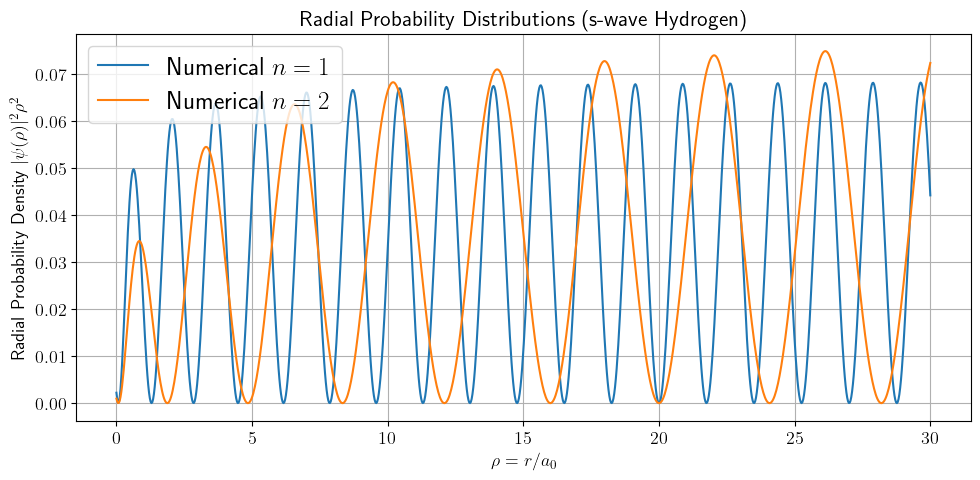

In [11]:
def schrodinger(rho, uvec, epsilon):
    u, up = uvec
    dudrho = up
    dupdrho = -2 * (epsilon + 1/rho) * u
    return [dudrho, dupdrho]

def shoot(epsilon, rho_max=20):
    sol = sc.integrate.solve_ivp(schrodinger,[1e-5, rho_max],[1e-5, 1e-5],args=(epsilon,),rtol=1e-8, atol=1e-8)
    return sol.y[0, -1]  # u(ρ_max)

def compute_wavefunction(epsilon, rho_max=30):
    sol = sc.integrate.solve_ivp(schrodinger,[1e-5,rho_max],[1e-5,1e-5],args=(epsilon,),t_eval=np.linspace(1e-5,rho_max,1000),rtol=1e-8,atol=1e-8)
    rho = sol.t
    u = sol.y[0]
    psi = u / rho
    prob_density = (psi**2) * rho**2
    norm = np.trapz(prob_density, rho)
    return rho, prob_density / norm
    
hbar_c = 1973                                 # eV·Å
mu = 0.511e6                                  # eV/c²
e = 3.795                                     # (eV·Å)^{1/2}
hbar2_2mu = hbar_c**2 / (2 * mu)              # (ħ²)/(2μ)
E0 = mu * e**4 / (2 * hbar_c**2)              # Hartree energy ≈ 13.6 eV
a0 = hbar_c**2 / (mu * e**2)                  # Bohr radius ≈ 0.529 Å
eps0 = sc.optimize.bisect(shoot, 0.8, 1.8)    # n=1
eps1 = sc.optimize.bisect(shoot, 0.15, 0.35)  # n=2
rho0, prob0 = compute_wavefunction(eps0)
rho1, prob1 = compute_wavefunction(eps1)

plt.figure(figsize=(10, 5))
plt.plot(rho0, prob0, label="Numerical $n=1$")
plt.plot(rho1, prob1, label="Numerical $n=2$")
plt.xlabel(r"$\rho = r / a_0$")
plt.ylabel(r"Radial Probability Density $|\psi(\rho)|^2 \rho^2$")
plt.title("Radial Probability Distributions (s-wave Hydrogen)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()